In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
df_org = pd.read_csv("order_item-export.csv")

In [2]:
df_org

,order_id,inserted_at,updated_at,item_name,price_nok,category_name,customization_key,customization_value,price_increment_nok,constant_price
0,2h8feraee987wr8,2025-09-08 06:24:07.411Z,2025-09-08 06:24:07.708Z,Latte,10,Varm drikke,Melk,Hel,0,1
1,2h8feraee987wr8,2025-09-08 06:24:07.411Z,2025-09-08 06:24:07.708Z,Latte,10,Varm drikke,Kopp,Liten,10,1
2,2h8feraee987wr8,2025-09-08 06:24:07.411Z,2025-09-08 06:24:07.708Z,Latte,10,Varm drikke,Smak,Salt karamell,0,1
3,8ongct2f5xfef2u,2025-09-08 06:34:42.518Z,2025-09-08 06:34:42.820Z,Latte,10,Varm drikke,Kopp,Liten,10,1
4,kq17fr27xsp9y0l,2025-09-08 06:40:47.608Z,2025-09-08 06:40:47.911Z,Chai Latte,10,Varm drikke,Melk,Havre,0,1
...,...,...,...,...,...,...,...,...,...,...
915,rf13d0a6e0a64b0,2025-10-20T07:11:59.066365Z,2025-10-20T07:11:59.073715Z,Cortado,10,Varm drikke,Ekstra,Sirup,5,1
916,rf13d0a6e0a64b0,2025-10-20T07:11:59.066365Z,2025-10-20T07:11:59.073715Z,Cortado,10,Varm drikke,Smak,Hassel,0,1
917,r92ac4745d57e79,2025-10-20T07:14:34.485234Z,2025-10-20T07:14:34.486948Z,Cappuccino,10,Varm drikke,Kopp,Egen,0,1
918,r9d3d4830190d66,2025-10-20T07:16:28.761617Z,2025-10-20T07:16:28.764860Z,Latte,10,Varm drikke,Kopp,Egen,0,1


In [3]:
def sum_or_product(series, constant_price):
    return series.sum() if constant_price == 1 else series.prod()


df = (
    df_org
    .groupby(["order_id", "item_name", "category_name"])
    .apply(lambda x: pd.DataFrame({
        # Keep group keys explicitly
        "order_id": [x["order_id"].iloc[0]],
        "item_name": [x["item_name"].iloc[0]],
        "category_name": [x["category_name"].iloc[0]],

        # Pivot customization keys to lists
        **{
            key: [list(x.loc[x["customization_key"] == key, "customization_value"])]
            for key in x["customization_key"].dropna().unique()
        },

        # Conditional aggregation
        "price_nok": [
            sum_or_product(x["price_nok"], x["constant_price"].iloc[0])
        ],
        "price_increment_nok": [
            sum_or_product(x["price_increment_nok"], x["constant_price"].iloc[0])
        ],

        # Keep constant_price
        "constant_price": [x["constant_price"].iloc[0]],

        # Keep timestamps
        "inserted_at": [x["inserted_at"].min()],
        "updated_at": [x["updated_at"].max()],
    }))
    .reset_index(drop=True)
)

df['Smak'] = df['Smak'].apply(lambda x: x[0] if isinstance(x, list) and x else np.nan)
df['Smak_id'] = df['Smak'].astype('category').cat.codes
df['Kopp'] = df['Kopp'].apply(lambda x: x[0] if isinstance(x, list) and x else np.nan)
df['Kopp_id'] = pd.Categorical(
    df['Kopp'], 
    categories=["Egen", "Liten", "Stor", "Plastikkopp"], 
    ordered=True
).codes
df['Melk'] = df['Melk'].apply(lambda x: x[0] if isinstance(x, list) and x else np.nan)
df['Melk_id'] = df['Melk'].astype('category').cat.codes
df['Ekstra'] = df['Ekstra'].apply(lambda x: x[0] if isinstance(x, list) and x else np.nan)
df['Ekstra_id'] = df['Ekstra'].astype('category').cat.codes
df['category_id'] = df['category_name'].astype('category').cat.codes
df['item_id'] = df['item_name'].astype('category').cat.codes

df['inserted_at'] = pd.to_datetime(df['inserted_at'], utc=True, format="mixed")
df['updated_at'] = pd.to_datetime(df['updated_at'], utc=True, format="mixed")

/tmp/ipykernel_44890/1595832662.py:8: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: pd.DataFrame({


In [4]:
df

,order_id,item_name,category_name,Smak,price_nok,price_increment_nok,constant_price,inserted_at,updated_at,Kopp,Annet,Melk,Ekstra,Smak_id,Kopp_id,Melk_id,Ekstra_id,category_id,item_id
0,01998pxj9hc3us2,Islatte,Kald drikke,Vanilje,10,0,1,2025-09-10 07:34:33.687000+00:00,2025-09-10 07:34:33.978000+00:00,NaN,NaN,NaN,NaN,2,-1,-1,-1,1,7
1,0269me8gxlmn3n2,Islatte,Kald drikke,Salt karamell,30,0,1,2025-09-16 08:49:00.374000+00:00,2025-09-16 08:49:00.781000+00:00,Egen,[Klippekort],NaN,NaN,1,0,-1,-1,1,7
2,04k7u9nmystrm1x,Islatte,Kald drikke,Vanilje,10,0,1,2025-09-08 07:16:54.345000+00:00,2025-09-08 07:16:54.699000+00:00,NaN,NaN,NaN,NaN,2,-1,-1,-1,1,7
3,05nl03f8ggl0l5b,Varm Sjokolade m/krem,Varm drikke,NaN,10,0,1,2025-09-15 08:52:38.304000+00:00,2025-09-15 08:52:38.613000+00:00,Egen,NaN,NaN,NaN,-1,0,-1,-1,2,19
4,08wp022mnaux5yk,Latte,Varm drikke,Vanilje,10,0,1,2025-09-12 06:43:33.533000+00:00,2025-09-12 06:43:33.883000+00:00,NaN,NaN,NaN,NaN,2,-1,-1,-1,2,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
607,z0jc0sly0bfu966,Latte,Varm drikke,Salt karamell,30,0,1,2025-09-16 09:00:25.248000+00:00,2025-09-16 09:00:25.583000+00:00,Egen,[Klippekort],NaN,NaN,1,0,-1,-1,2,14
608,z9ho8o39dghcuu4,Latte,Varm drikke,NaN,10,5,1,2025-09-10 07:21:38.502000+00:00,2025-09-10 07:21:38.810000+00:00,NaN,NaN,NaN,Espresso,-1,-1,-1,0,2,14
609,zc3jtn9ev339t99,Varm Sjokolade m/krem,Varm drikke,NaN,10,0,1,2025-09-15 08:29:58.755000+00:00,2025-09-15 08:29:59.081000+00:00,Egen,NaN,NaN,NaN,-1,0,-1,-1,2,19
610,zf95mwoz2a5rb5f,"Iste, Pasjonsfrukt",Kald drikke,NaN,10,10,1,2025-09-25 08:37:44.352000+00:00,2025-09-25 08:37:44.658000+00:00,Plastikkopp,NaN,NaN,NaN,-1,-1,-1,-1,1,9


Text(0.5, 1.0, 'Mest kjøpte produkter')

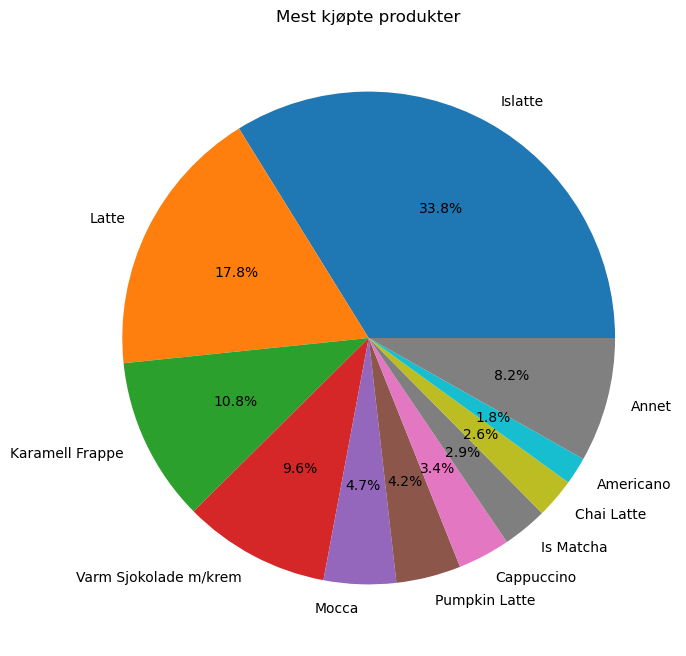

In [24]:
counts = df["item_name"].value_counts()
top10 = counts.head(10)
other = counts[10:].sum()
top10_with_other = pd.concat([top10, pd.Series({'Annet': other})])

colors = plt.cm.tab10.colors
colors = list(colors[:len(top10)]) + ['gray']

# Plot
top10_with_other.plot(
    kind="pie",
    autopct='%1.1f%%',
    figsize=(8, 8),
    colors=colors
)
plt.title("Mest kjøpte produkter")

<Axes: title={'center': 'Correlation heatmap'}>

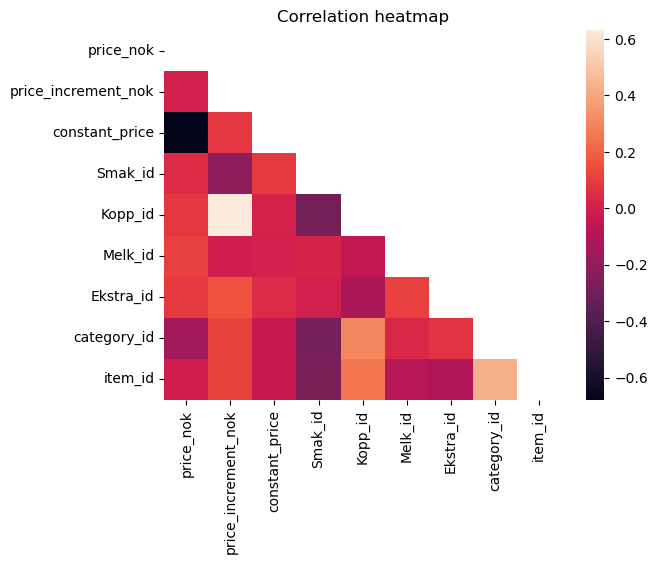

In [6]:
df_n = df.select_dtypes(include=["number"])
corr = df_n.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
ax = sns.heatmap(corr, mask=mask)
ax.set_title("Correlation heatmap")
ax

Text(0.5, 1.0, 'Mest valgte kopptype')

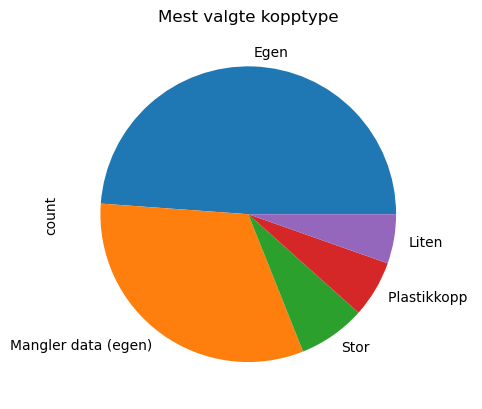

In [23]:
df["Kopp"].fillna("Mangler data (egen)").value_counts().plot(kind="pie")
plt.title("Mest valgte kopptype")


<Axes: ylabel='count'>

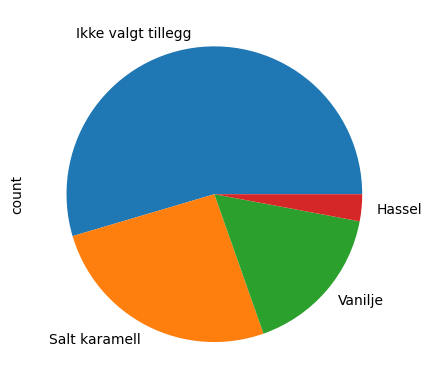

In [19]:
df["Smak"].fillna("Ikke valgt tillegg").value_counts().plot(kind="pie")


<Axes: ylabel='count'>

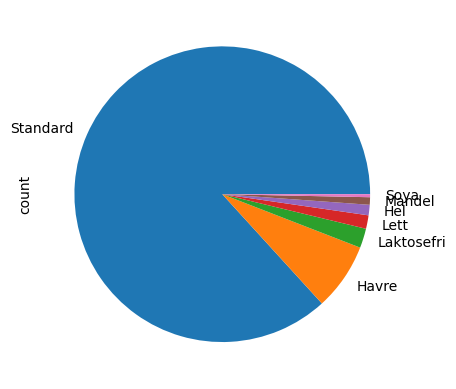

In [20]:
df["Melk"].fillna("Standard").value_counts().plot(kind="pie")


<Axes: ylabel='count'>

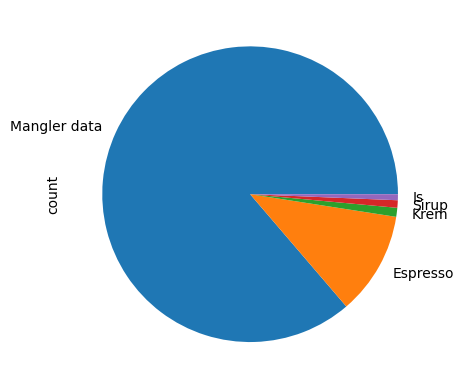

In [21]:
df["Ekstra"].fillna("Mangler data").value_counts().plot(kind="pie")


<Axes: ylabel='count'>

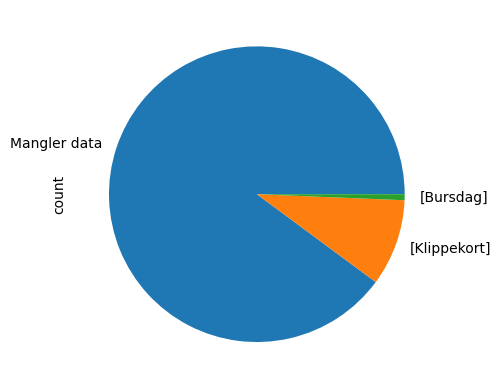

In [22]:
df["Annet"].fillna("Mangler data").value_counts().plot(kind="pie")


In [12]:
df["first"].fillna("Mangler data").value_counts()

first
Mangler data    550
Klippekort       58
Bursdag           4
Name: count, dtype: int64

<Axes: ylabel='count'>

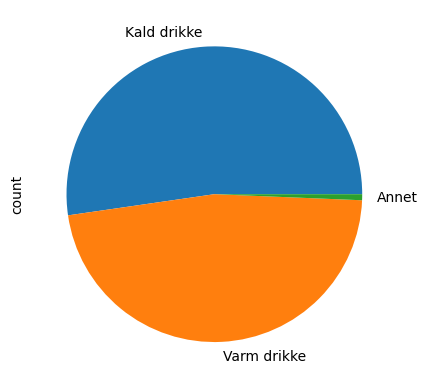

In [13]:
df["category_name"].value_counts().plot(kind="pie")

In [14]:
df

,order_id,item_name,category_name,Smak,price_nok,price_increment_nok,constant_price,inserted_at,updated_at,Kopp,Annet,Melk,Ekstra,Smak_id,Kopp_id,Melk_id,Ekstra_id,category_id,item_id,first
0,01998pxj9hc3us2,Islatte,Kald drikke,Vanilje,10,0,1,2025-09-10 07:34:33.687000+00:00,2025-09-10 07:34:33.978000+00:00,NaN,NaN,NaN,NaN,2,-1,-1,-1,1,7,None
1,0269me8gxlmn3n2,Islatte,Kald drikke,Salt karamell,30,0,1,2025-09-16 08:49:00.374000+00:00,2025-09-16 08:49:00.781000+00:00,Egen,[Klippekort],NaN,NaN,1,0,-1,-1,1,7,Klippekort
2,04k7u9nmystrm1x,Islatte,Kald drikke,Vanilje,10,0,1,2025-09-08 07:16:54.345000+00:00,2025-09-08 07:16:54.699000+00:00,NaN,NaN,NaN,NaN,2,-1,-1,-1,1,7,None
3,05nl03f8ggl0l5b,Varm Sjokolade m/krem,Varm drikke,NaN,10,0,1,2025-09-15 08:52:38.304000+00:00,2025-09-15 08:52:38.613000+00:00,Egen,NaN,NaN,NaN,-1,0,-1,-1,2,19,None
4,08wp022mnaux5yk,Latte,Varm drikke,Vanilje,10,0,1,2025-09-12 06:43:33.533000+00:00,2025-09-12 06:43:33.883000+00:00,NaN,NaN,NaN,NaN,2,-1,-1,-1,2,14,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
607,z0jc0sly0bfu966,Latte,Varm drikke,Salt karamell,30,0,1,2025-09-16 09:00:25.248000+00:00,2025-09-16 09:00:25.583000+00:00,Egen,[Klippekort],NaN,NaN,1,0,-1,-1,2,14,Klippekort
608,z9ho8o39dghcuu4,Latte,Varm drikke,NaN,10,5,1,2025-09-10 07:21:38.502000+00:00,2025-09-10 07:21:38.810000+00:00,NaN,NaN,NaN,Espresso,-1,-1,-1,0,2,14,None
609,zc3jtn9ev339t99,Varm Sjokolade m/krem,Varm drikke,NaN,10,0,1,2025-09-15 08:29:58.755000+00:00,2025-09-15 08:29:59.081000+00:00,Egen,NaN,NaN,NaN,-1,0,-1,-1,2,19,None
610,zf95mwoz2a5rb5f,"Iste, Pasjonsfrukt",Kald drikke,NaN,10,10,1,2025-09-25 08:37:44.352000+00:00,2025-09-25 08:37:44.658000+00:00,Plastikkopp,NaN,NaN,NaN,-1,-1,-1,-1,1,9,None


Text(0.5, 1.0, 'Bestillinger per ukedag')

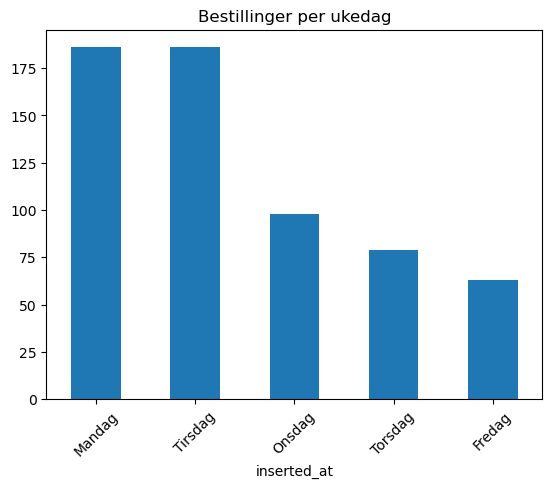

In [15]:
ax = df["inserted_at"].dt.weekday.value_counts().sort_index().plot(kind="bar")
weekday_names = ['Mandag', 'Tirsdag', 'Onsdag', 'Torsdag', 'Fredag']
ax.set_xticklabels(weekday_names, rotation=45)
plt.title("Bestillinger per ukedag")

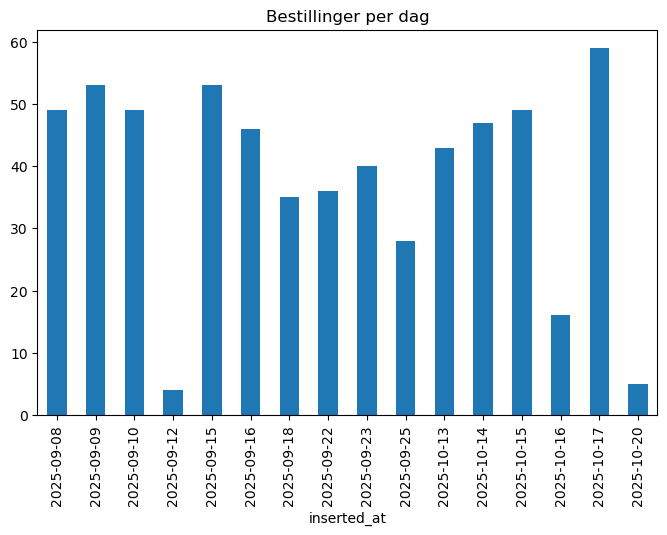

0      2025-09-10
1      2025-09-16
2      2025-09-08
3      2025-09-15
4      2025-09-12
          ...    
607    2025-09-16
608    2025-09-10
609    2025-09-15
610    2025-09-25
611    2025-09-09
Name: inserted_at, Length: 612, dtype: object

In [16]:
daily_counts = df['inserted_at'].dt.date.value_counts().sort_index()
days_since_start = [(d - min(daily_counts.index)).days for d in daily_counts.index]

plt.figure(figsize=(8, 5))
daily_counts.plot(kind="bar")
plt.title('Bestillinger per dag')
plt.show()

df["inserted_at"].dt.date

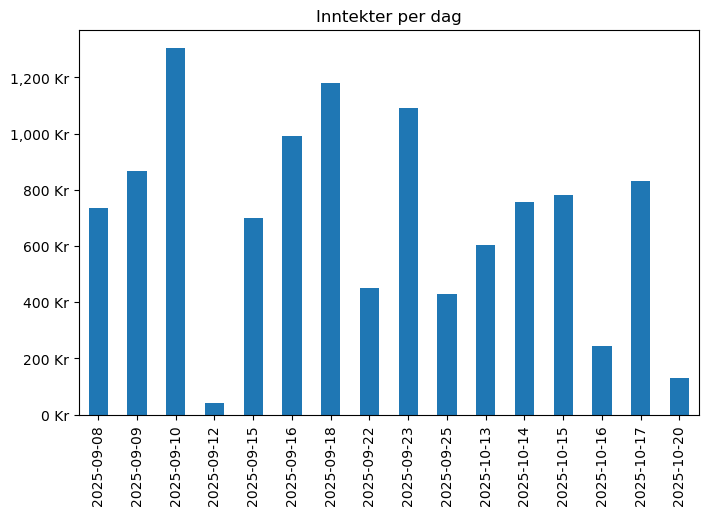

In [17]:
from matplotlib.ticker import StrMethodFormatter

# Group by date and sum the prices
daily_sums = df.groupby(df['inserted_at'].dt.date)['price_nok'].sum().sort_index()

# Plot
plt.figure(figsize=(8, 5))
ax = daily_sums.plot(kind='bar')
plt.title("Inntekter per dag")
plt.xlabel("")

# Format y-axis with thousand separators and add "Kr"
ax.yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f} Kr'))

plt.show()